In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nptdms import TdmsFile
from pathlib import Path
import math
import pathlib
import os
# importing sys
import sys
nb_path = Path.cwd()

In [2]:
pack_path = nb_path.parent / "src" #/"arenz_group_python"
print(nb_path.parent)
print(pack_path)
print(f"path existits: {pack_path.exists()}")

c:\Users\gusta\Documents\GitHub\Arenz_Group_Python
c:\Users\gusta\Documents\GitHub\Arenz_Group_Python\src
path existits: True


In [3]:
#add
sys.path.insert(0,str(pack_path))
import arenz_group_python
print(arenz_group_python.__path__)

loading arenz_group_python
['c:\\Users\\gusta\\Documents\\GitHub\\Arenz_Group_Python\\src\\arenz_group_python']
['c:\\Users\\gusta\\Documents\\GitHub\\Arenz_Group_Python\\src\\arenz_group_python']


In [4]:
import arenz_group_python.data_treatment
print(arenz_group_python.data_treatment.__path__)

['c:\\Users\\gusta\\Documents\\GitHub\\Arenz_Group_Python\\src\\arenz_group_python\\data_treatment']


In [5]:
from arenz_group_python.data_treatment.ec_data import EC_Data
from arenz_group_python import *
from arenz_group_python import EC_Data
from arenz_group_python import CV_Data
from arenz_group_python import CV_Datas


In [6]:
str_path = str(pack_path)
#sys.path.append("C:/Users/gustav.wiberg/Documents/GitHub/Python/Arenz_Group_Python/src/ArenzGroupPython")
print(str_path)
sys.path.append(str_path)
#import ec_data
#ec_data.reload()
 

c:\Users\gusta\Documents\GitHub\Arenz_Group_Python\src


In [7]:
paths = []
path_to_dataSetFolder = nb_path / "data" / "set1"
#paths.append( path_to_dataSetFolder / "CV_144913_ 3.tdms")
paths.append( path_to_dataSetFolder / "CV_153559_ 3.tdms")
#paths.append( path_to_dataSetFolder / "CV_153541_ 3.tdms")
paths.append( path_to_dataSetFolder / "CV_153333_ 3.tdms")
#paths.append( path_to_dataSetFolder / "CV_151300_ 3.tdms")
#paths.append( path_to_dataSetFolder / "CV_151725_ 3.tdms")
paths.append( path_to_dataSetFolder / "CV_151512_ 3.tdms")



TypeError: cannot unpack non-iterable Axes object

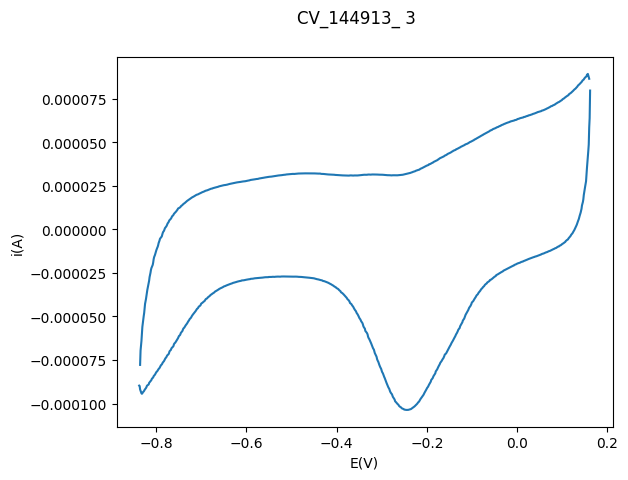

In [10]:
bg_path = path_to_dataSetFolder / "CV_144913_ 3.tdms"
bg_cv = CV_Data(bg_path,y_smooth = 5, legend="name")
#bg_cv.conv(EC_Data(bg_path),y_smooth = 4) 
line, ax = bg_cv.plot()
ax.legend()

AttributeError: 'CV_Data' object has no attribute '_area'

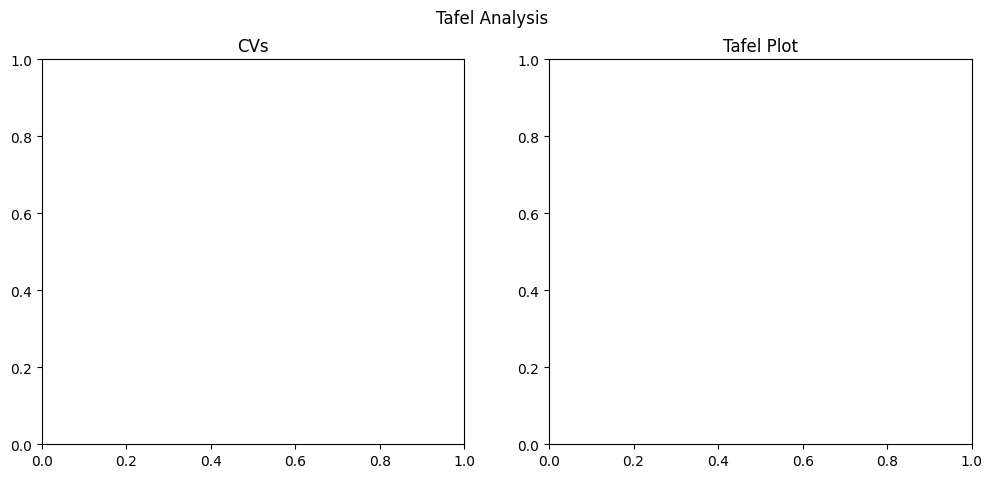

In [9]:
CVs = CV_Datas(paths, y_smooth=0)
CVs.bg_corr(bg_cv)
CVs.Tafel(-0.5,[-0.15,-.05], "area")

